In [82]:
import os
os.system("pip install -U neuralplot")
os.system("pip install -U ann_visualizer")
os.system("pip install -U graphviz")
os.system("pip install kviz")
os.system("pip install keras-visualizer")

0

In [83]:
from neuralplot import ModelPlot
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
from tensorflow.keras import Sequential as Sqtl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

In [85]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

### Note! You cannot use random python functions, activation function gets as an input tensorflow tensors and should return tensors. There are a lot of helper functions in keras backend.
def custom_activation(x):  
    return ( (2/(1 + K.exp(-x))) -1)
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [86]:
datasetku = pd.DataFrame({"x1":[1,1],"x2":[1,-1],"y":[-1,1]})

initku1 = tf.constant_initializer(np.array([[0.2,0.3],[0.4,0.3]]))
initku2 = tf.constant_initializer(np.array([[0.2],[0.3]]))

bias1 = tf.constant_initializer(np.array([[0.2],[0.2]]))
bias2 = tf.constant_initializer(np.array([[0.1]]))

model = Sqtl([Dense(2,input_dim=2,
                    activation="custom_activation",
                    kernel_initializer=initku1,
                    bias_initializer=bias1,
),
              Dense(1,activation="custom_activation",
                    kernel_initializer = initku2,
                    bias_initializer=bias2
)])

In [87]:
pendataan = \
"""digraph G {
    subgraph cluster_0 {
		node [style=filled,color=indianred1];
		x1[fontcolor=white];x2[fontcolor=white];
		label="Input Layer";
		color=white;
        
	}
	subgraph cluster_1{
	    node [style=filled,color=Turquoise];
		z1[fontcolor=white];z2[fontcolor=white];
		color=white;
	}
	subgraph cluster_2{
	    node [style=filled,color=green];
		Y[fontcolor=white];
		label="Output Layer";
		labelloc="b";
		color=white;
	}
	x1->z1[label="W11 = 0.2"];
	x1->z2[label="W12 = 0.3"];
	x2->z1[label="W21 = 0.4"];
	x2->z2[label="W22 = 0.3"];
	z1->Y[label="W1Y = 0.2"];
	z2->Y[label="W2Y = 0.3"];
}"""
open("neural_network.gv","w").write(pendataan)

600

Adanya di sebelah kiri ya pembacaan labelnya

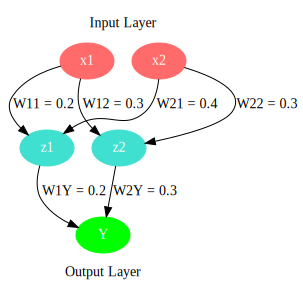

In [88]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="My first neural network",filename="Rizal.gv")

from graphviz import Source
Source.from_file('neural_network.gv')

## Inisiasi dari weight dahulu

In [89]:
print("weightnya : ",model.layers[0].get_weights()[0])
print("Bias ",model.layers[0].get_weights()[1])

weightnya :  [[0.2 0.3]
 [0.4 0.3]]
Bias  [0.2 0.2]


In [90]:
print("weightnya : ",model.layers[1].get_weights()[0])
print("Bias ",model.layers[1].get_weights()[1])

weightnya :  [[0.2]
 [0.3]]
Bias  [0.1]


Lakukan Neural Network

In [91]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

optimum = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(loss='mse',optimizer=optimum,metrics=['accuracy'])
historyku = model.fit(datasetku[["x1","x2"]],
                      datasetku[["y"]],epochs=1,
                      callbacks=[tensorboard_callback])

1/1 [==============================] - 1s 752ms/step - loss: 1.0916 - accuracy: 0.0000e+00


## Ini hasil dari backpropragation

In [92]:
print("weightnya : ",model.layers[0].get_weights()[0])
print("Bias ",model.layers[0].get_weights()[1])

weightnya :  [[0.19993167 0.2998628 ]
 [0.39527562 0.29294813]]
Bias  [0.19993167 0.19986281]


In [93]:
print("weightnya : ",model.layers[1].get_weights()[0])
print("Bias ",model.layers[1].get_weights()[1])

weightnya :  [[0.18935892]
 [0.2916792 ]]
Bias  [0.09527355]
